In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_excel("评论整合.xlsx")
#文本内容清洗，清楚特殊符号，用正则表达式
import re
pattern = r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_^{|}~—！，。？、￥…（）：【】《》‘’“”\s]+"
re_obj = re.compile(pattern)

#方案B：
def clear(text):
    return re_obj.sub("",text)
data['评论'] = data['评论'].apply(clear)
data

,序号,评论,预测值,评价类别
0,1,菌藻共生系统是第一次那么系统的了解感谢🙏已经关注期待更新,0.522524,正面
1,2,之前一直没了解过污水处理这篇文章很清楚地介绍了藻菌共生系统学到了学到了呲牙,0.334314,负面
2,3,讲的太专业了受益匪浅,0.913399,正面
3,4,第一次了解到藻菌共生系统能处理污水而且还安全有效惊喜,0.243817,负面
4,5,东华理工学子来串门了又长新知识啦继续保持更新OKOKOK,0.556603,正面
...,...,...,...,...
75,76,很棒很喜欢打call打call打call继续保持,0.947791,正面
76,77,说实话第一次这么全面的了解到污水处理方面的知识实在是太惊喜了打call打call打call,0.308796,负面
77,78,很不错继续保持更新哦打call打call打call,0.781060,正面
78,79,很不错的科普文章希望继续保持更新OKOKOK,0.995704,正面


In [5]:
from googletrans import Translator

In [6]:
import jieba
#方案A：返回生成器
def cut_word(text):
    return jieba.cut(text)
data['评论'] = data['评论'].apply(cut_word)


In [7]:
#方案A：使用set
def get_stopword():
    s = set()
    with open('stopword.txt',encoding = 'UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword = get_stopword()
data['评论'] = data['评论'].apply(remove_stopword)



Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86136\AppData\Local\Temp\jieba.cache
Loading model cost 0.753 seconds.
Prefix dict has been built successfully.


In [8]:
from itertools import chain
from collections import Counter
li_2d = data['评论'].tolist()
#将二维列表转换为一维
li_1d = list(chain.from_iterable(li_2d))
c = Counter(li_1d)
common = c.most_common(15)


In [14]:
ld2=['Fungi and algae',
 'Symbiosis',
 'System',
 'First time',
 'System',
 'Thank you',
 '🙏',
 'Attention',
 'Looking forward to',
 'Updates',
 'Sewage treatment',
 'Article',
 'Introduction',
 'Algae and fungi',
 'Symbiosis',
 'System',
 'Learned',
 'Learned',
 'Gritted teeth',
 'Grinning',
 'Said',
 'Too',
 'Professional',
 'Learned a lot',
 'First time',
 'Algae and fungi',
 'Symbiosis',
 'System',
 'Sewage',
 'Surprises',
 'Donghua',
 'University',
 'Students',
 'Visit',
 'Long',
 'New',
 'Knowledge',
 'Updates',
 'OKOKOK',
 'Professional',
 'Leave it to',
 'Professional',
 'Team',
 'Feel',
 'Learned',
 'Something',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Nice',
 'Said',
 'Too',
 'Professional',
 'Great',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Hushing',
 'Hushing',
 'Hushing',
 'Fungi and algae',
 'Symbiosis',
 'System',
 'Knowledge',
 'From various aspects',
 'Open',
 'Eyes',
 'Applause',
 'Applause',
 'Applause',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Year of the Rabbit',
 'Like',
 'Blogger',
 'Content',
 'Keep it up',
 'Learned',
 'Learned',
 'Call',
 'Updates',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Learned',
 'Learned',
 'Up',
 'Host',
 'Updates',
 'Smile',
 'Smile',
 'Smile',
 'Smile',
 'Smile',
 'Year of the Rabbit',
 'Biology',
 'Sewage treatment',
 'Promising',
 'Really',
 'Like',
 'Blogger',
 'Content',
 'Thank you',
 'For sharing',
 'Single doge',
 'Single doge',
 'Single doge',
 'Learning',
 'Algae and fungi',
 'Symbiosis',
 'System',
 'Sewage treatment',
 'New',
 'Knowledge',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Algae and fungi',
 'Symbiosis',
 'System',
 'Yeah Yeah Yeah',
 'Algae and fungi',
 'Symbiosis',
 'System',
 'New',
 'Knowledge',
 'Learned',
 'Learned',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'OK',
 'Fungi and algae',
 'Symbiosis has',
 'Empowering',
 'Biological',
 'Sewage treatment',
 'Huge role',
 'Call',
 'Call',
 'Call',
 'Hope',
 'Updates',
 'Algae and fungi',
 'Symbiosis',
 'System',
 'Knowledge',
 'Smile',
 'Smile',
 'Smile',
 'Sob',
 'Sob',
 'Sob',
 'Tons of dry goods',
 'Updates',
 'Awesome',
 'Heart',
 'Heart',
 'Learn',
 'Sewage treatment',
 'New',
 'Policies',
 'Thank you',
 'Up',
 'Host',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'New',
 'Technologies',
 'Star',
 'Eyes',
 'Content',
 'Dry goods',
 'Layout',
 'Novelty',
 'Updates',
 'Single doge',
 'Single doge',
 'Single doge',
 'Sewage treatment',
 'Chemical',
 'Methods',
 'Economical',
 'Causing',
 'Pollution',
 'Biological',
 'Methods',
 'Empower',
 'The future',
 'Great',
 '☺',
 'Team',
 'So many',
 'Beautiful girls',
 'Fun',
 'Excellent',
 'Quickly',
 'Attention',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Smile',
 'Support',
 'Biological',
 'Empower',
 'Sewage treatment',
 'Call',
 'Impressive',
 'Knowledge',
 'Science popularization',
 'Support',
 'Donghua',
 'University',
 'Students',
 'Sewage treatment',
 'Have not',
 'Read',
 'Article',
 'Feel',
 'Learned',
 'Something',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Heart',
 'Heart',
 'Up',
 'Keep it up',
 'Policies',
 'In this area',
 'Few',
 'Thank you',
 'Science popularization',
 'Doge',
 'Wow',
 'Wow',
 'Article',
 'Sewage',
 'Biological',
 'Empowerment',
 'Clear',
 'Understanding',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Star',
 'Eyes',
 'Support',
 'Learned',
 'Up',
 'Keep it up',
 'Itchy',
 'Feels',
 '2023FZPTCHINAiGEM',
 'Article',
 'Gotta',
 'Have a lot in mind',
 'Wonderful',
 'Wonderful',
 'Wonderful',
 'Sewage treatment',
 'Knowledge',
 'Really',
 'Applause',
 'Applause',
 'Applause',
 'Professional',
 'Updates',
 'OKOKOK',
 'Sewage treatment',
 'Really',
 'Very few',
 'Domestic sewage',
 'Finished',
 'Articles',
 'Sewage treatment',
 'Various',
 'Methods',
 'Changing',
 'Article',
 'Content',
 'Truly',
 'Exciting',
 'Heart',
 'Heart',
 'Heart',
 'Scary sewage',
 '😱',
 'Up',
 'Host is',
 'Amazing',
 'Call',
 'Call',
 'Call',
 'Call',
 'Call',
 'Heart',
 'Heart',
 'Heart',
 'Heart',
 'Great',
 'Sewage',
 'A bit dark',
 'A bit',
 'Didn',
 'Knowledge',
 'Call',
 'Learned',
 'Great',
 '👍',
 'Content',
 'Heart',
 'Heart',
 'Heart',
 'Heart',
 'Sewage treatment',
 'Knowledge',
 'Awesome',
 'Update',
 'Call',
 'Up',
 'Host',
 'Article',
 'Feel',
 'Benefited greatly',
 'Hope',
 'Updates',
 'OK',
 'Like',
 'Up',
 'Host',
 'Share',
 'Content',
 'Hope',
 'Updates',
 'Cracking seeds',
 'Cracking seeds',
 'Cracking seeds',
 'Update',
 'Call',
 'Call',
 'Call',
 'Call',
 'Great',
 'Call',
 'Call',
 'Call',
 'Great',
 'Like',
 'Call',
 'Call',
 'Call',
 'To be honest',
 'First time',
 'Sewage treatment',
 'Knowledge',
 'Really',
 'Surprised',
 'Call',
 'Call',
 'Call',
 'Not bad',
 'Update',
 'Call',
 'Call',
 'Call',
 'Not bad',
 'Science popularization',
 'Article',
 'Hope',
 'Updates',
 'OKOKOK',
 'Sewage',
 'Can be divided into',
 'Categories',
 'Learned',
 'Picking',
 'Nose',
 'Picking',
 'Nose',
 'Picking',
 'Nose']
ld3 = ['microalgae' if item == 'Star' or item == 'Eyes' else item for item in ld2]
ld4 = ['easy understand' if item == 'Call'  else item for item in ld3]
ld5 = ['know more' if item == 'Year of the Rabbit'  else item for item in ld4]

In [15]:
c = Counter(ld5)
common = c.most_common(15)
common

[('microalgae', 47),
 ('easy understand', 28),
 ('Heart', 15),
 ('Sewage treatment', 13),
 ('Learned', 13),
 ('know more', 12),
 ('Updates', 11),
 ('Knowledge', 10),
 ('System', 9),
 ('Smile', 9),
 ('Symbiosis', 8),
 ('Article', 7),
 ('Up', 7),
 ('Algae and fungi', 6),
 ('Great', 6)]

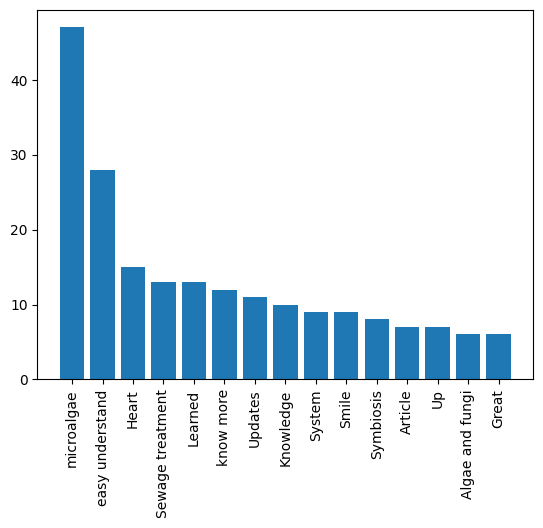

In [16]:
import matplotlib.pyplot as plt
# 给定的列表数据
data = common
# 拆分列表数据为标签和值
labels = [item[0] for item in data]
values = [item[1] for item in data]
# 创建柱状图
plt.bar(labels, values)
# 设置x轴标签倾斜角度，以防止标签重叠
plt.xticks(rotation='vertical')
# 显示图形
plt.show()

In [17]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud #导入相关库
background_pic = 'igem.png' #形状蒙版图片转换为数值数组
images = Image.open(background_pic) #打开形状蒙版图片
maskImages = np.array(images) #将形状蒙版图片转换为数值数组
content = ' '.join(ld4) #把列表转换为字符串
wc = WordCloud(font_path='simhei.ttf',#字体文件路径（这里为黑体）
               background_color='white',#背景颜色（这里为白色）
                width=1000,#宽度
                height=600,#高度
               mask = maskImages #应用形状蒙版
                 ).generate(content) #绘制词云图
wc.to_file('词云图+自定义形状.png') #导出成PNG格式图片（使用相对路径）


将提取的数据打印出来：
 0                       菌藻共生系统是第一次那么系统的了解，感谢🙏已经关注，期待更新！
1             之前一直没了解过污水处理，这篇文章很清楚地介绍了藻菌共生系统，学到了学到了[呲牙]
2                                          讲的太专业了！受益匪浅！
3                       第一次了解到藻菌共生系统能处理污水，而且还安全有效！！[惊喜]
4                  东华理工学子来串门了，又长新知识啦，继续保持更新[OK][OK][OK]
                            ...                        
75                       很棒很喜欢[打call][打call][打call]继续保持
76    说实话第一次这么全面的了解到污水处理方面的知识，实在是太惊喜了[打call][打call][...
77                      很不错继续保持更新哦[打call][打call][打call]
78                        很不错的科普文章，希望继续保持更新[OK][OK][OK]
79                        原来污水分为这么多种类，重新学到了[抠鼻][抠鼻][抠鼻]
Name: 评论, Length: 80, dtype: object


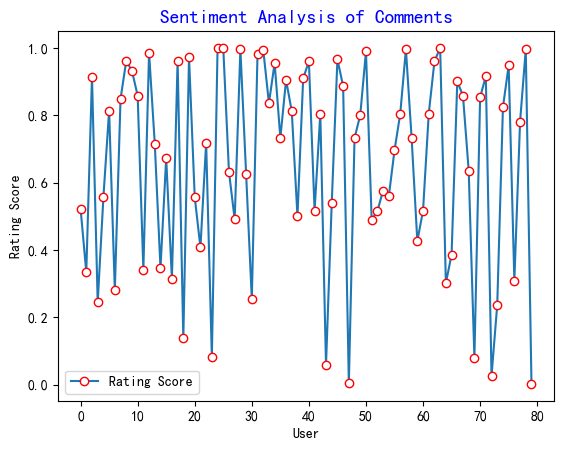

In [18]:
#加载情感分析模块
from snownlp import SnowNLP
#from snownlp import sentiment
import pandas as pd
import matplotlib.pyplot as plt
 
#读取文本数据
df=pd.read_excel('评论整合.xlsx')
#提取所有数据
df1=df.iloc[:,1]
print('将提取的数据打印出来：\n',df1)
# 遍历每条评论进行预测
values=[SnowNLP(i).sentiments for i in df1]
#输出积极的概率，大于0.5积极的，小于0.5消极的
#myval保存预测值
myval=[]
good=0
bad=0
for i in values:
   if (i>=0.5):
       myval.append("正面")
       good=good+1
   else:
       myval.append("负面")
       bad=bad+1
df['预测值']=values
df['评价类别']=myval
#将结果输出到Excel
rate=good/(good+bad)
#作图
y=values
plt.rc('font', family='SimHei', size=10)
plt.plot(y, marker='o', mec='r', mfc='w',label=u'Rating Score')
plt.xlabel('User')
plt.ylabel('Rating Score')
# 让图例生效
plt.legend()
#添加标题
plt.title('Sentiment Analysis of Comments',family='SimHei',size=14,color='blue')
plt.show()

In [19]:
counts = df["评价类别"].value_counts()
counts

正面    58
负面    22
Name: 评价类别, dtype: int64

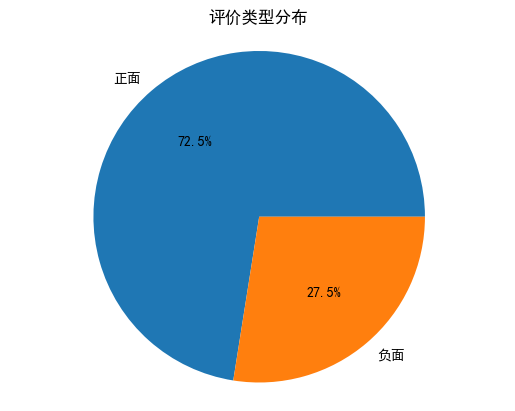

In [20]:
labels = counts.index.tolist()
values = counts.values.tolist()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # 保持圆形
plt.title('评价类型分布')

# 显示图形
plt.show()